### Generate the Cities List by Using the `citipy` Library

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
#

In [38]:
# Import necessary modules
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        
        # Check if response status is OK (200)
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_wind = city_weather.get("wind", {}).get("speed")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")

            # Append the city information into city_data list
            city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })

        else:
            # Log failure status code
            print(f"Failed to fetch data for city: {city}. Status code: {response.status_code}")

    # Handle exceptions and skip the city in case of error
    except requests.RequestException as e:
        print(f"An error occurred while fetching data for city: {city}. Error: {e}")
        continue

# Indicate that data retrieval is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | bazpur
Processing Record 7 of Set 1 | chernyshevsk
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | selfoss
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | zhosaly
Processing Record 16 of Set 1 | egilsstadir
Processing Record 17 of Set 1 | kaya
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | san jose village
Failed to fetch data for city: san jose village. Status code: 404
Processing Record 20 of Set 1 | port-aux-francais
Process

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,13.10,81,32,13.97,NZ,1713755935
1,jamestown,42.0970,-79.2353,-1.01,85,3,2.13,US,1713755936
2,ribeira grande,38.5167,-28.7000,15.05,74,100,2.65,PT,1713755936
3,blackmans bay,-43.0167,147.3167,17.46,56,11,1.64,AU,1713755936
4,mount gambier,-37.8333,140.7667,22.35,23,2,3.35,AU,1713755936


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.10,81,32,13.97,NZ,1713755935
1,jamestown,42.0970,-79.2353,-1.01,85,3,2.13,US,1713755936
2,ribeira grande,38.5167,-28.7000,15.05,74,100,2.65,PT,1713755936
3,blackmans bay,-43.0167,147.3167,17.46,56,11,1.64,AU,1713755936
4,mount gambier,-37.8333,140.7667,22.35,23,2,3.35,AU,1713755936


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

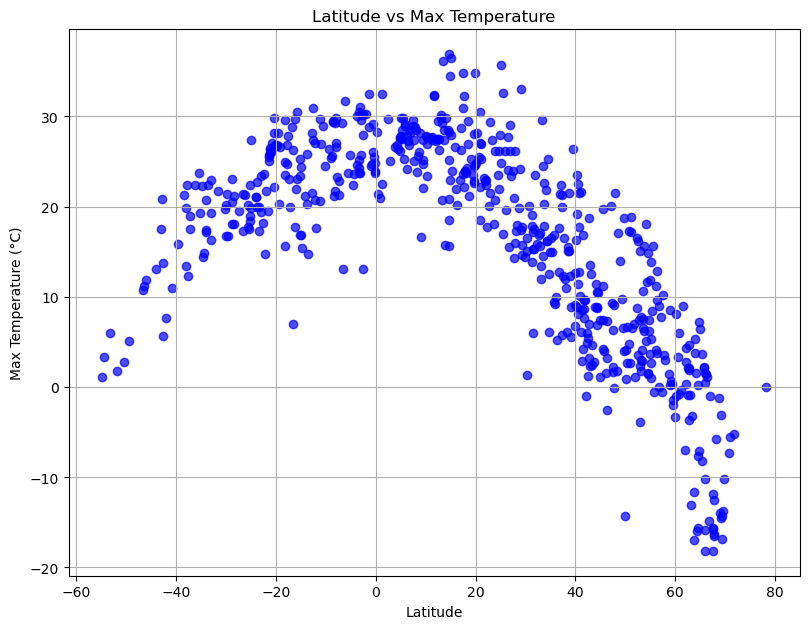

In [43]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='blue', alpha=0.7)

plt.grid(True)
plt.tight_layout()


# Incorporate the other graph properties
plt.title('Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')

# Save the figure
plt.savefig("output_data_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

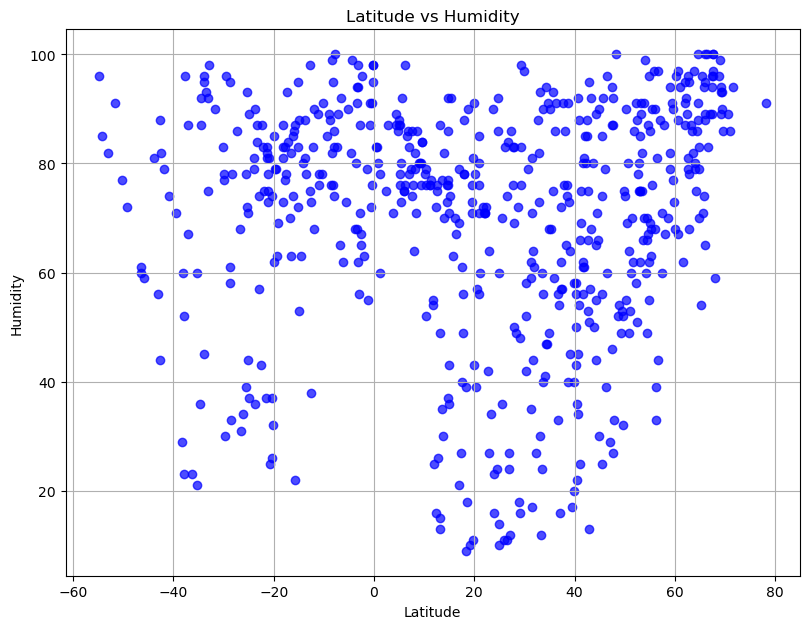

In [44]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='blue', alpha=0.7)

plt.grid(True)
plt.tight_layout()
# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

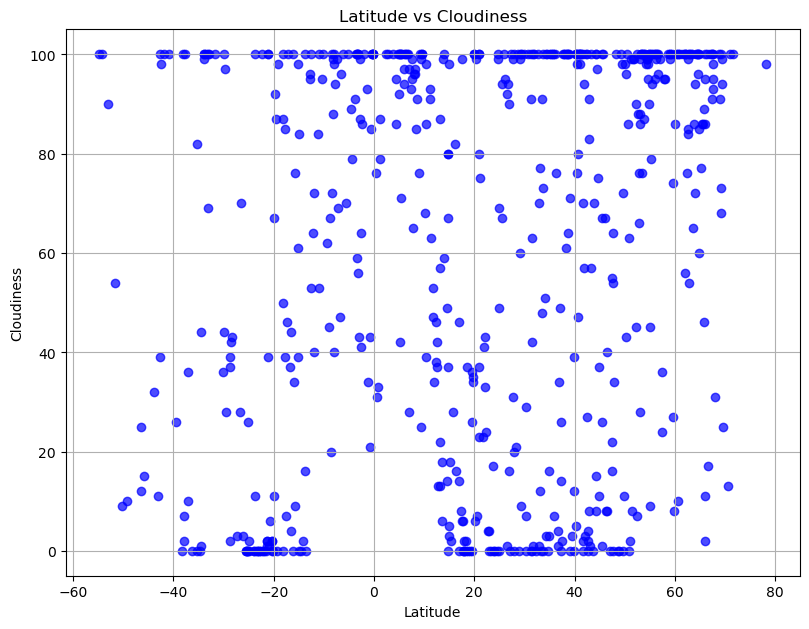

In [45]:
# Build the scatter plots for latitude vs. Cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='blue', alpha=0.7)

plt.grid(True)
plt.tight_layout()
# Incorporate the other graph properties
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

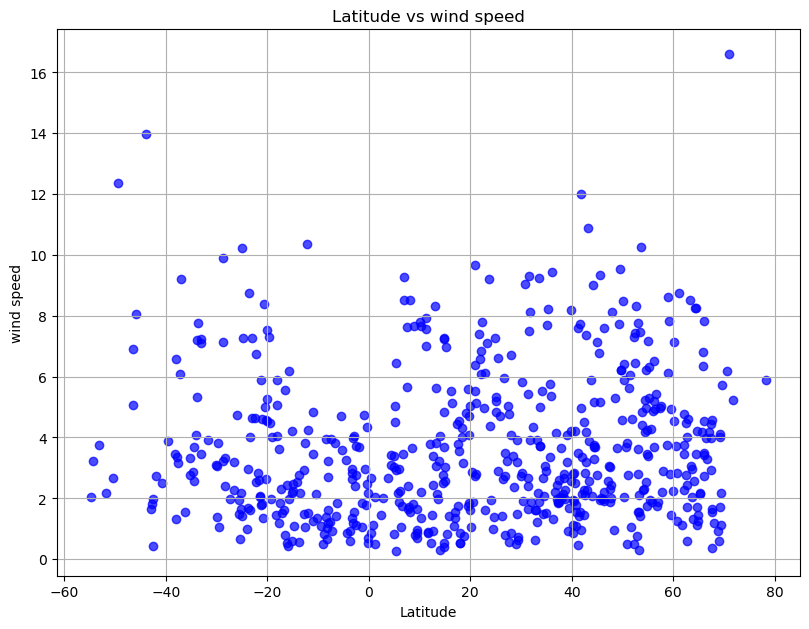

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='blue', alpha=0.7)

plt.grid(True)
plt.tight_layout()
# Incorporate the other graph properties
plt.title('Latitude vs wind speed')
plt.xlabel('Latitude')
plt.ylabel('wind speed')

# Save the figure
plt.savefig("output_data_Fig34.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title):
    """
    Create a linear regression plot.

    Parameters:
        x_values (array-like): The x values for the plot.
        y_values (array-like): The y values for the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        title (str): The title for the plot.
    """
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}'

    # Calculate correlation coefficient
    r_value, _ = (x_values, y_values)

    # Create scatter plot
    plt.scatter(x_values, y_values, color='blue', alpha=0.7)

    # Plot regression line
    plt.plot(x_values, regress_values, color='red')

    # Annotate line equation
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color='red')

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Print correlation coefficient
    print("Correlation coefficient (r):", r_value)

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,-1.01,85,3,2.13,US,1713755936
2,ribeira grande,38.5167,-28.7000,15.05,74,100,2.65,PT,1713755936
5,bazpur,29.1500,79.1167,33.01,16,60,3.20,IN,1713755936
6,chernyshevsk,52.5243,117.0174,3.60,88,100,6.45,RU,1713755937
8,bilibino,68.0546,166.4372,-5.73,59,31,1.20,RU,1713755937


In [55]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,13.10,81,32,13.97,NZ,1713755935
3,blackmans bay,-43.0167,147.3167,17.46,56,11,1.64,AU,1713755936
4,mount gambier,-37.8333,140.7667,22.35,23,2,3.35,AU,1713755936
7,edinburgh of the seven seas,-37.0676,-12.3116,17.55,87,36,9.21,SH,1713755937
10,bredasdorp,-34.5322,20.0403,14.41,92,44,2.58,ZA,1713755938


###  Temperature vs. Latitude Linear Regression Plot

Correlation coefficient (r): City_ID
1      42.0970
2      38.5167
5      29.1500
6      52.5243
8      68.0546
        ...   
589    52.9463
591    48.3554
592    28.6290
593    27.6711
594    61.0393
Name: Lat, Length: 392, dtype: float64


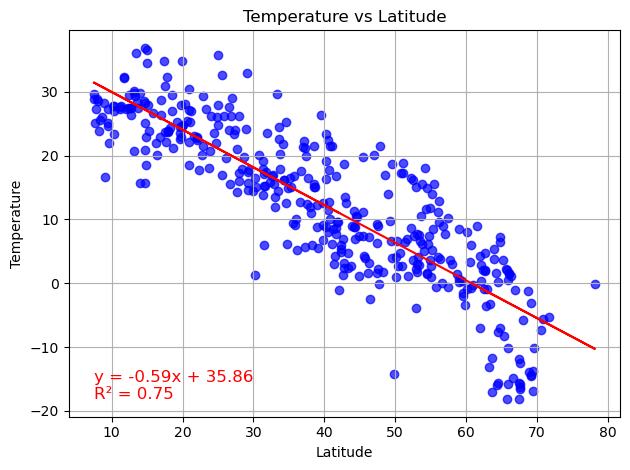

In [52]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Temperature", "Temperature vs Latitude")


Correlation coefficient (r): City_ID
0     -43.9535
3     -43.0167
4     -37.8333
7     -37.0676
10    -34.5322
        ...   
574    -7.7136
575   -20.1000
580    -9.0122
585   -40.8135
590    -3.8004
Name: Lat, Length: 176, dtype: float64


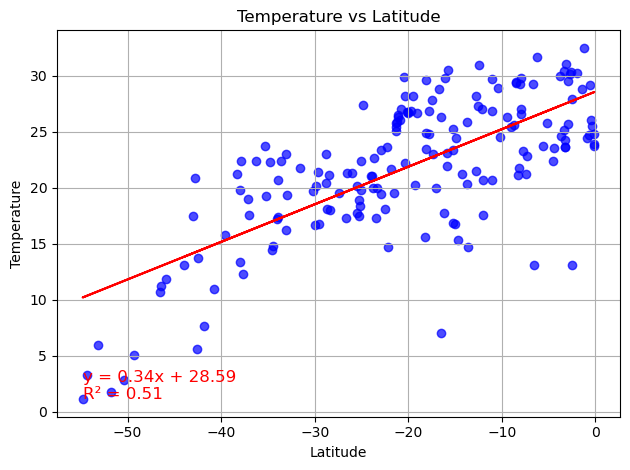

In [57]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Temperature", "Temperature vs Latitude")

**Discussion about the linear relationship:** As the latitude tends to be more to the 0 the temperature tends to rise. so if we are ate the ecuator the temperature should be higher than if we are in the poles. this makes a lot of sense. 

### Humidity vs. Latitude Linear Regression Plot

Correlation coefficient (r): City_ID
1      42.0970
2      38.5167
5      29.1500
6      52.5243
8      68.0546
        ...   
589    52.9463
591    48.3554
592    28.6290
593    27.6711
594    61.0393
Name: Lat, Length: 419, dtype: float64


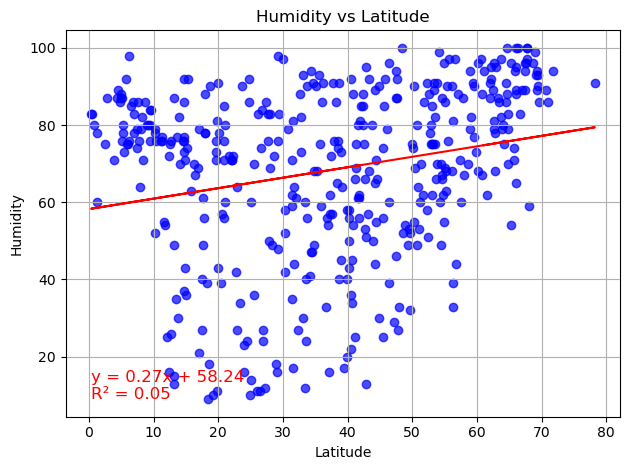

In [59]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", "Humidity vs Latitude")

Correlation coefficient (r): City_ID
0     -43.9535
3     -43.0167
4     -37.8333
7     -37.0676
10    -34.5322
        ...   
574    -7.7136
575   -20.1000
580    -9.0122
585   -40.8135
590    -3.8004
Name: Lat, Length: 176, dtype: float64


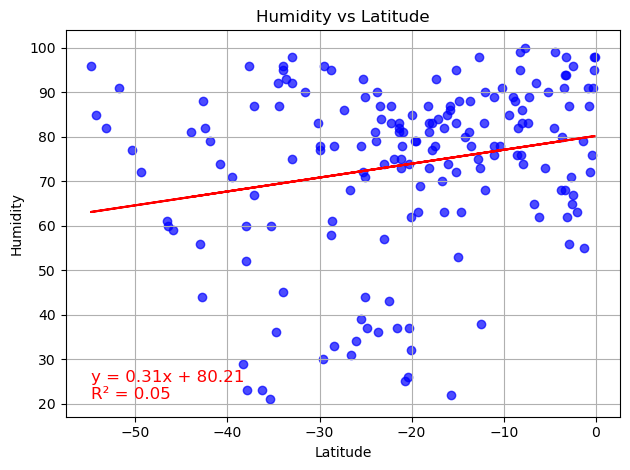

In [60]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity", "Humidity vs Latitude")

**Discussion about the linear relationship:** As the R2 of both we can see is really low there is no relation, if we analyze a little bit this migh have a little bit more to do with the regions close to seas or rivers, maybe lakes than to the latitude in the world. 

### Cloudiness vs. Latitude Linear Regression Plot

Correlation coefficient (r): City_ID
1      42.0970
2      38.5167
5      29.1500
6      52.5243
8      68.0546
        ...   
589    52.9463
591    48.3554
592    28.6290
593    27.6711
594    61.0393
Name: Lat, Length: 419, dtype: float64


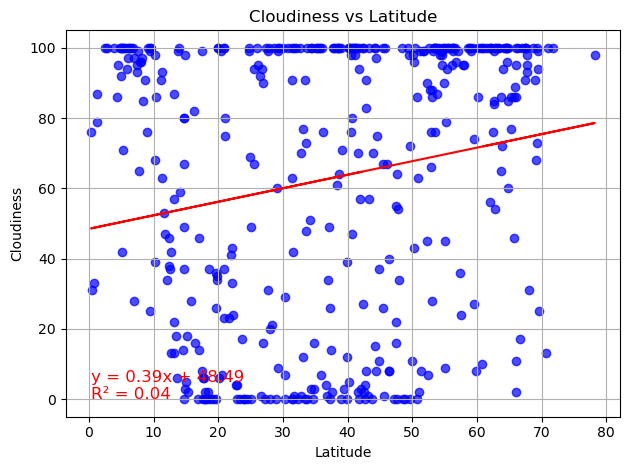

In [62]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Cloudiness vs Latitude")

Correlation coefficient (r): City_ID
0     -43.9535
3     -43.0167
4     -37.8333
7     -37.0676
10    -34.5322
        ...   
574    -7.7136
575   -20.1000
580    -9.0122
585   -40.8135
590    -3.8004
Name: Lat, Length: 176, dtype: float64


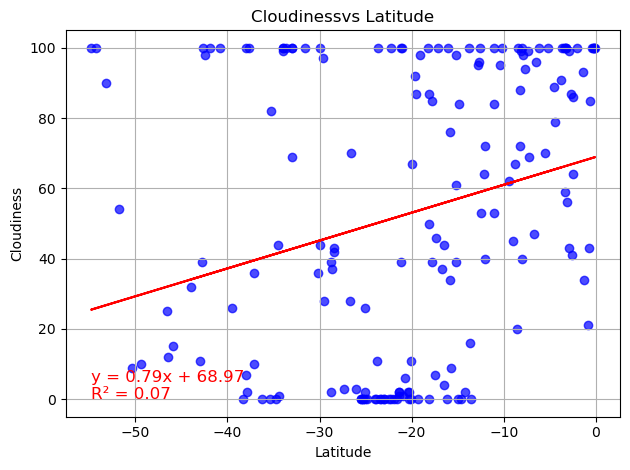

In [63]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", "Cloudinessvs Latitude")

**Discussion about the linear relationship:** As in the last one of humidity Cloudiness also has no visible relation with the Latitude

### Wind Speed vs. Latitude Linear Regression Plot

Correlation coefficient (r): City_ID
1      42.0970
2      38.5167
5      29.1500
6      52.5243
8      68.0546
        ...   
589    52.9463
591    48.3554
592    28.6290
593    27.6711
594    61.0393
Name: Lat, Length: 419, dtype: float64


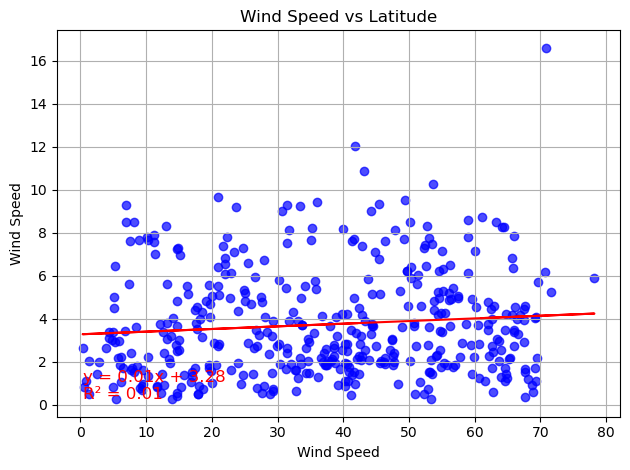

In [66]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed", "Wind Speed", "Wind Speed vs Latitude")

Correlation coefficient (r): City_ID
0     -43.9535
3     -43.0167
4     -37.8333
7     -37.0676
10    -34.5322
        ...   
574    -7.7136
575   -20.1000
580    -9.0122
585   -40.8135
590    -3.8004
Name: Lat, Length: 176, dtype: float64


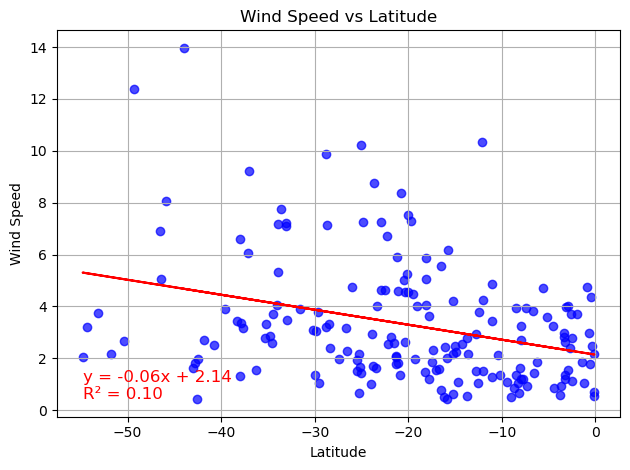

In [69]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", "Wind Speed vs Latitude")

**Discussion about the linear relationship:** APPEARS TO BE ARELATION FURTHER FROM THE ECUATOR MORE SPEED BUT, THEN AGAIN THERE IS NO PROOF THAT THIS IS A VALID RELATION. 